## This is an initial data visulization/cleaning of the MEMIC dataset.
## The Timestamp was used for indexinge

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Loading Data

In [5]:
#set index to Timestamp column
df = pd.read_csv("C:\\Users\\DELL5490\\Desktop\\Master2\\Quadramind\\Quadramind\\Kafka\\mimic_2425.csv", parse_dates = True, index_col = 0)
df.head()

,RR,SPO2,MAP,SBP,DBP,HR,PP,CO
2020-10-18 15:24:25,35.0,99.9,0.0,0.0,0.0,106.9,0.0,0.00
2020-10-18 15:25:25,36.4,100.0,87.0,98.9,63.1,107.3,35.8,3841.34
2020-10-18 15:26:25,35.2,100.0,75.2,97.9,63.0,107.5,34.9,3751.75
2020-10-18 15:27:25,34.0,100.0,74.8,97.2,62.5,107.0,34.7,3712.90
2020-10-18 15:28:25,34.9,100.0,74.0,96.0,62.0,107.0,34.0,3638.00


Descriptive Statistics

In [49]:
len(df)


12877

In [50]:
df.describe()

,RR,SPO2,MAP,SBP,DBP,HR,PP,CO
count,12877.000000,12877.000000,12877.000000,12877.000000,12877.000000,12877.000000,12877.000000,12877.000000
mean,16.900497,96.954974,70.492087,96.910445,54.564798,87.332663,42.345647,3675.148708
std,6.689418,7.461224,9.642583,19.424266,10.350134,12.355479,11.114098,939.202070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.300000,96.500000,66.500000,91.200000,52.700000,79.000000,36.000000,3237.850000
50%,15.500000,97.500000,70.100000,99.200000,55.600000,84.000000,43.300000,3787.200000
75%,21.300000,98.900000,74.100000,107.200000,59.000000,94.700000,50.600000,4215.120000
max,51.800000,100.000000,270.000000,224.800000,118.900000,121.000000,105.900000,8768.520000


Checking for missing values

In [51]:
#percentages of missing values
df.isnull().sum()/len(df)*100

RR      0.0
SPO2    0.0
MAP     0.0
SBP     0.0
DBP     0.0
HR      0.0
PP      0.0
CO      0.0
dtype: float64

array([[<AxesSubplot:title={'center':'RR'}>,
        <AxesSubplot:title={'center':'SPO2'}>,
        <AxesSubplot:title={'center':'MAP'}>],
       [<AxesSubplot:title={'center':'SBP'}>,
        <AxesSubplot:title={'center':'DBP'}>,
        <AxesSubplot:title={'center':'HR'}>],
       [<AxesSubplot:title={'center':'PP'}>,
        <AxesSubplot:title={'center':'CO'}>, <AxesSubplot:>]],
      dtype=object)

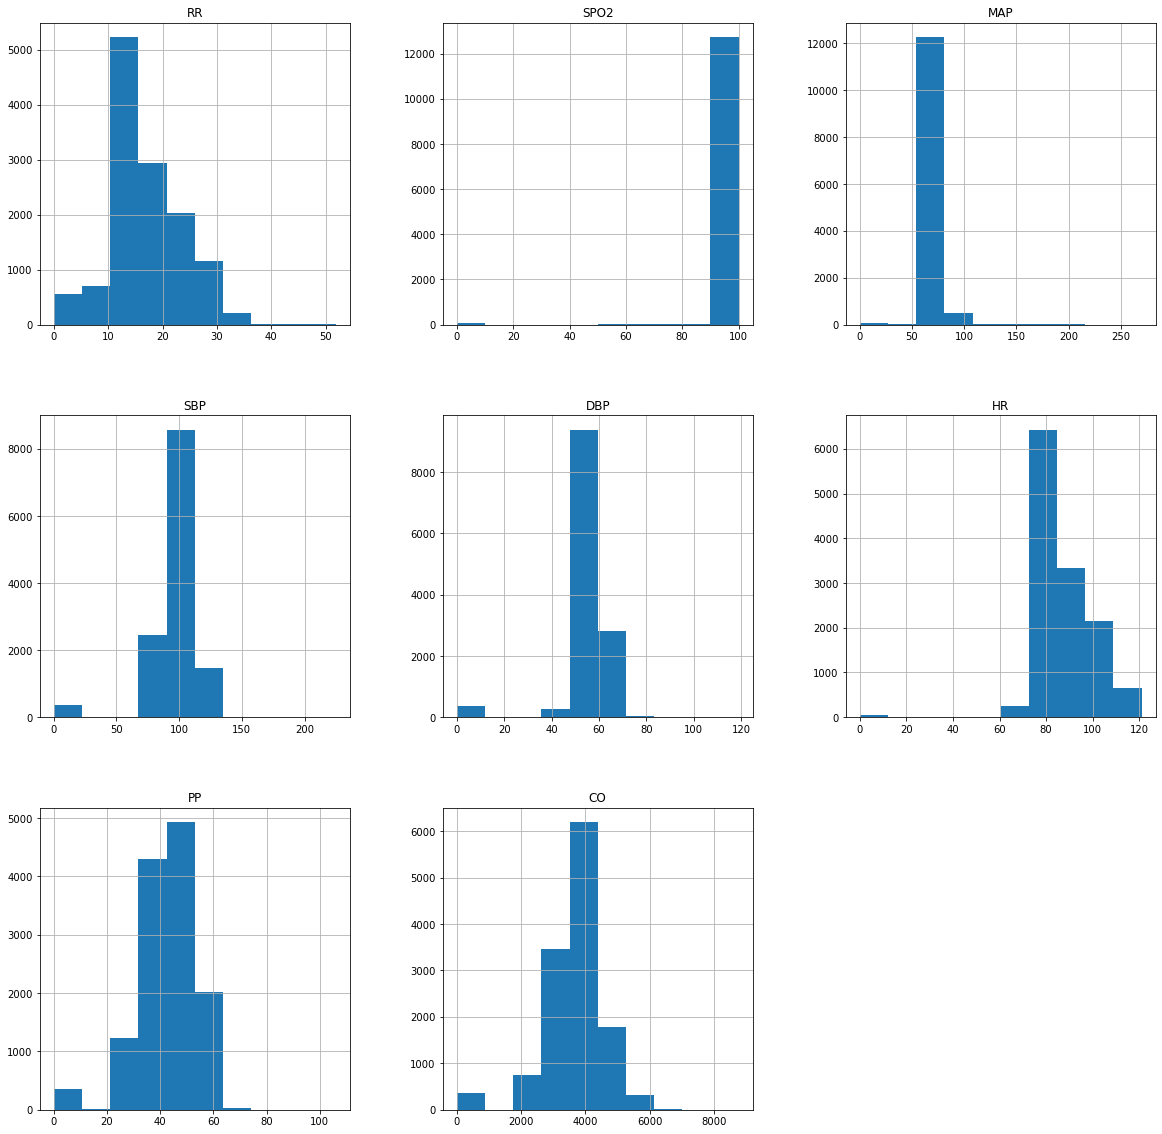

In [52]:
df.hist(figsize=(20, 20))

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

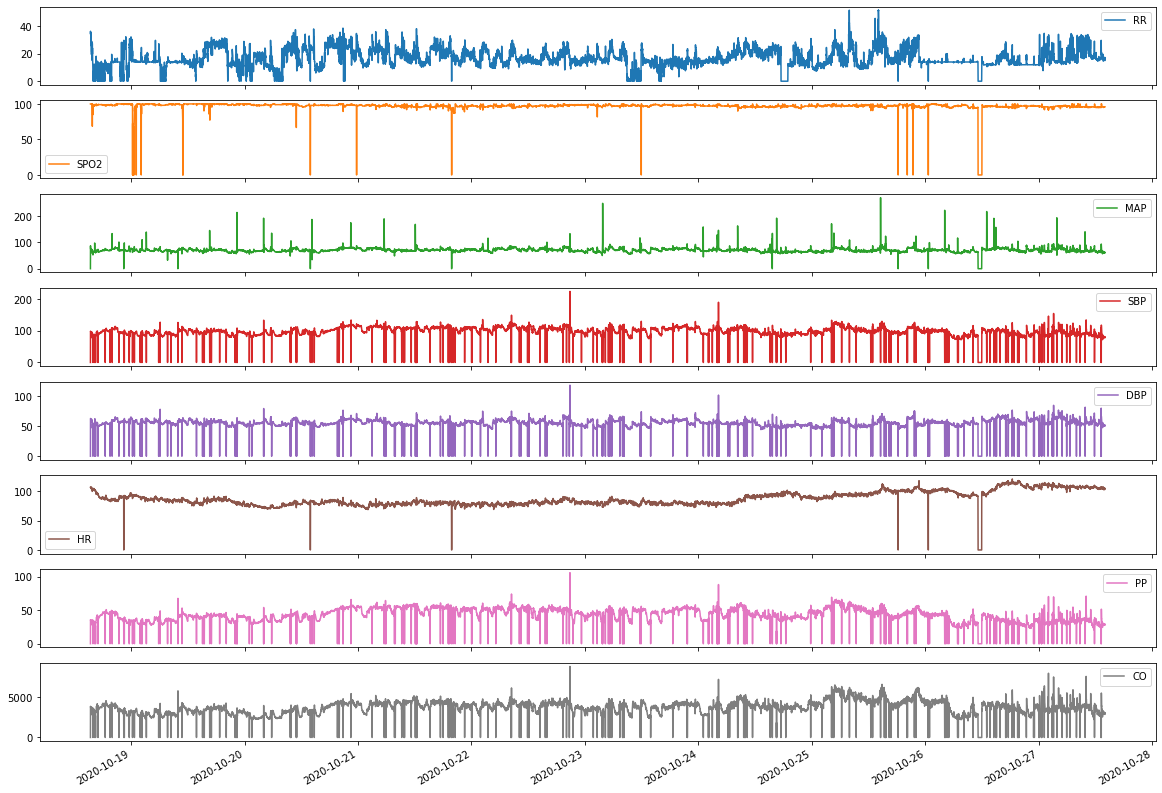

In [53]:
df.plot(subplots=True, figsize=(20, 15))

Correlation matrix among all features

In [8]:

# Create correlation matrix
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)
print(corr_matrix)
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

            RR      SPO2       MAP       SBP       DBP        HR        PP  \
RR    1.000000  0.117130  0.278639  0.224796  0.134827  0.137561  0.267319   
SPO2  0.117130  1.000000  0.403313  0.282811  0.293232  0.324565  0.221198   
MAP   0.278639  0.403313  1.000000  0.202461  0.175193  0.209231  0.190693   
SBP   0.224796  0.282811  0.202461  1.000000  0.897576  0.007487  0.911836   
DBP   0.134827  0.293232  0.175193  0.897576  1.000000  0.193994  0.637445   
HR    0.137561  0.324565  0.209231  0.007487  0.193994  1.000000  0.167574   
PP    0.267319  0.221198  0.190693  0.911836  0.637445  0.167574  1.000000   
CO    0.311071  0.197904  0.182345  0.872482  0.677366  0.227637  0.894044   

            CO  
RR    0.311071  
SPO2  0.197904  
MAP   0.182345  
SBP   0.872482  
DBP   0.677366  
HR    0.227637  
PP    0.894044  
CO    1.000000  


<ipython-input-8-0046c56af819>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


Text(0.5, 1.0, 'Correlation Heatmap')

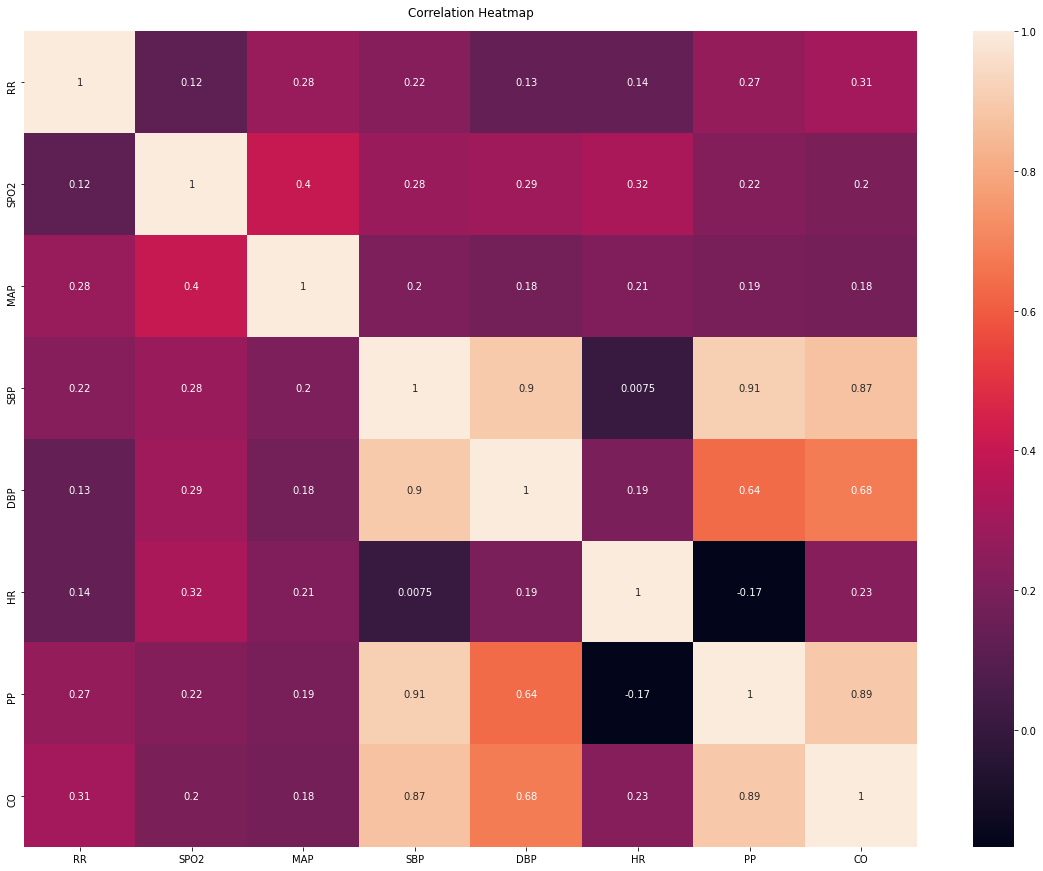

In [9]:
plt.subplots(figsize=(20,15))
corr_matrix = df.corr()
heatmap = sns.heatmap(corr_matrix, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=15)

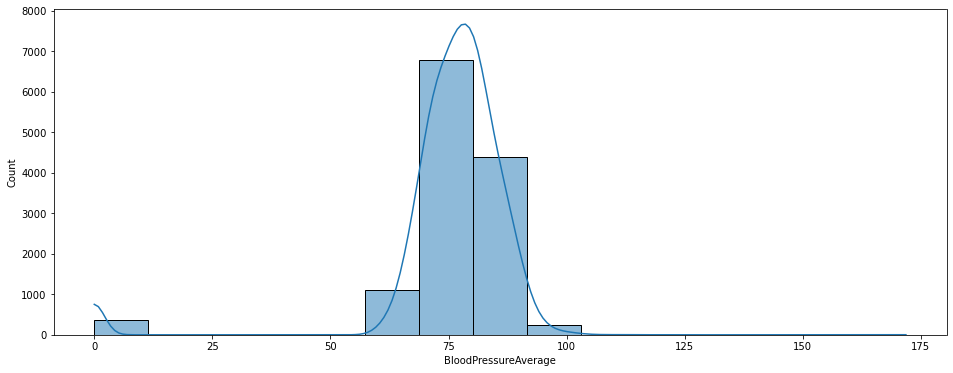

In [10]:
dff=df
df['BloodPressureAverage'] = df[['SBP', 'DBP']].mean(axis=1)

plt.figure(figsize=(16,6))
sns.histplot(data=df, x='BloodPressureAverage', bins=15, kde=True)
plt.show()

Blood Pressure average over one day 

array([<AxesSubplot:>], dtype=object)

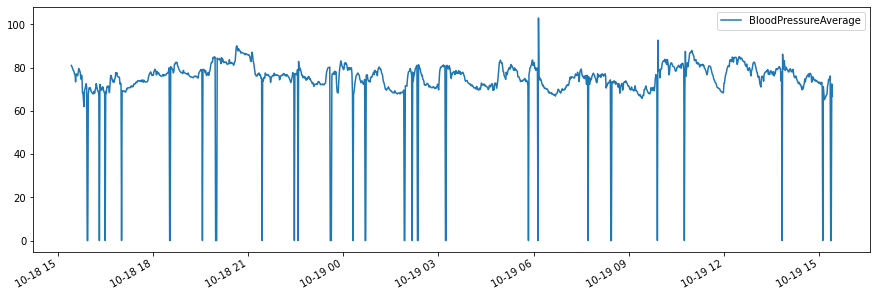

In [15]:
df['2020-10-18 15:25:25':'2020-10-19 15:25:25'].plot(y = 'BloodPressureAverage',subplots=True, figsize=(15, 5))